# 환경설정

In [0]:
!git clone https://github.com/kakao/khaiii.git
!pip install cmake
!mkdir build
!cd build && cmake /content/khaiii
!cd /content/build/ && make all
!cd /content/build/ && make resource
!cd /content/build && make install
!cd /content/build && make package_python
!pip install /content/build/package_python

In [2]:
from khaiii import KhaiiiApi
api = KhaiiiApi()
for word in api.analyze("정세균을 분석해보자."):
    print(word)

정세균을	정/NNG + 세균/NNP + 을/JKO
분석해보자.	분석/NNG + 하/XSV + 여/EC + 보/VX + 자/EF + ./SF


In [0]:
! pip install WordCloud

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm

In [5]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 19
['/usr/share/fonts/opentype/font-awesome/FontAwesome.otf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/font-awesome/fontawesome-webfont.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/Liber

In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [7]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 50
nanum_font number: 31


In [0]:
! pip install konlpy

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# cd /content/drive/My Drive/fininsight/21대 총선분석/TexkRank/

# KoBERT NER 제거

In [0]:
import pandas as pd

In [0]:
df_hwang = pd.read_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/황교안_ner.csv')
df_lee = pd.read_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/이낙연_ner.csv')
df_jongro = pd.read_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/종로구_ner.csv')

In [0]:
import re

def ner_clean(x):
  x = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\`\'…》]', '', x)
  xx = []
  for x in x.split(' '):
    if x == '':
      xx.append(x)
    elif x[0] != '<' and x[-1] != '>':
      xx.append(x)

  return ' '.join(xx)

In [17]:
df_hwang['ner_clean'] = df_hwang['kobert_ner'].apply(ner_clean)
df_hwang.head(3)

,Unnamed: 0,type,date,media,title,content,url,kobert_ner,ner_clean
0,0,news,2020-03-15 20:08:00,프레시안,"홍준표·민병두 무소속 출마 선언, 여야 '컷오프' 후유증","홍준표 ""승리해 원대 복귀"", 민병두 ""1위가 지상목표""4.15 총선을 한달 앞두고...",http://www.pressian.com/news/article.html?no=2...,"[' <홍준표:PER> ""승리해 원대 복귀"", <민병두:PER> ""<1위:NOH>가...",승리해 원대 복귀 총선을 앞두고 공천에서 배제된 여야 의원들의 무소속 출마 선언이...
1,1,news,2020-03-15 14:07:00,KBS,[일요진단 라이브] 공천과 비례정당으로 시끌…부정적 파장 최소화 하려면?,"박성민 ""미래통합당 공천, 전반적으로 전략도 없고 원칙도 없었다는 비판 못 면해"" ...",http://news.kbs.co.kr/news/view.do?ncd=4402078...,"[' <박성민:PER> ""<미래통합당:ORG> 공천, 전반적으로 전략도 없고 원칙도...",공천 전반적으로 전략도 없고 원칙도 없었다는 비판 못 면해 통합당 대선주자 배치 ...
2,2,news,2020-03-15 14:02:00,노컷뉴스,"홍준표 ""황교안·김형오 협잡공천 황당…압승 후 복귀""","컷오프 반발, 대구수성을 무소속 출마 선언 검찰사직, 성완종 사건 등 언급하며 “이...",https://www.nocutnews.co.kr/news/5308718,"[' 컷오프 반발, <대구수성을:LOC> 무소속 출마 선언 검찰사직, <성완종:PO...",컷오프 반발 무소속 출마 선언 검찰사직 사건 등 언급하며 “이번 공천배제가 가장 ...


In [0]:
df_hwang.to_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/황교안_noner.csv', index=False)

In [19]:
df_lee['ner_clean'] = df_lee['kobert_ner'].apply(ner_clean)
df_lee.head(3)

,type,date,media,title,content,url,kobert_ner,ner_clean
0,news,2020-03-15 14:07:00,KBS,[일요진단 라이브] 공천과 비례정당으로 시끌…부정적 파장 최소화 하려면?,박성민 미래통합당 공천 전반적으로 전략도 없고 원칙도 없었다는 비판 못 면해 박성민...,http://news.kbs.co.kr/news/view.do?ncd=4402078...,[],
1,news,2020-03-15 13:07:00,뉴시스,'신분당선 서북부연장선 성공적 추진 약속',이낙연 더불어민주당 서울 종로 예비후보 등이 15일 오후 서울 종로구 청운문학도서관...,http://www.newsis.com/view/?id=NISI20200315_00...,[' <이낙연:PER> <더불어민주당:ORG> <서울 종로:LOC> 예비후보 등이 ...,예비후보 등이 오후 열린 성공적 추진을 위한 국회의원 후보 총선공약 협약식에 참석...
2,news,2020-03-15 13:07:00,뉴시스,'신분당선 서북부연장을 위해',이낙연 더불어민주당 서울 종로 예비후보 등이 15일 오후 서울 종로구 청운문학도서관...,http://www.newsis.com/view/?id=NISI20200315_00...,[' <이낙연:PER> <더불어민주당:ORG> <서울 종로:LOC> 예비후보 등이 ...,예비후보 등이 오후 열린 성공적 추진을 위한 국회의원 후보 총선공약 협약식에 참석...


In [0]:
df_lee.to_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/이낙연_noner.csv', index=False)

In [21]:
df_jongro['ner_clean'] = df_jongro['kobert_ner'].apply(ner_clean)
df_jongro.head(3)

,type,date,media,title,content,url,content_clean,kobert_ner,ner_clean
0,news,2020-03-15 23:08:00,뉴시스,"코로나19 환자 80.8% '집단 발생'…""수도권 소규모 유행""",전체 확진자 61.3% 신천지 관련19.2% 개별조사중줌바댄스 충남 97.4%해수부...,http://www.newsis.com/view/?id=NISX20200315_00...,전체 확진자 613 신천지 관련192 개별조사중줌바댄스 충남 974해수부 세종 92...,[' 전체 확진자 <61.3%:PNT> <신천지:POH> 관련<19.2%:PNT> ...,전체 확진자 개별조사중줌바댄스 충남 집단 발생구로 콜센터 74경기 79<인LOC>...
1,news,2020-03-15 23:05:00,이데일리,정세균 총리 “금융까지 심각…코로나19 추가대책 적극 강구”,긴급 경제상황점검회의 주재“모든 가능성에 대비할 것”정세균 국무총리가 15일 서울 ...,http://www.edaily.co.kr/news/newspath.asp?news...,긴급 경제상황점검회의 주재모든 가능성에 대비할 것정세균 국무총리가 15일 서울 종로...,[' 긴급 경제상황점검회의 주재“모든 가능성에 대비할 것”<정세균:PER> 국무총리...,긴급 경제상황점검회의 주재“모든 가능성에 대비할 국무총리가 열린 긴급경제상황점검회...
2,news,2020-03-15 23:03:00,세계일보,정세균 “민생경제 지원 강화…미증유 상황서 정부 대응 달라져야”,“코로나19 모든 가능성 대비 민생경제 충격 최소화부터”정세균 국무총리가 신종 코로...,http://www.segye.com/content/html/2020/03/15/2...,코로나19 모든 가능성 대비 민생경제 충격 최소화부터정세균 국무총리가 신종 코로나바...,[' <“코로나19:POH> 모든 가능성 대비 민생경제 충격 최소화부터”<정세균:P...,모든 가능성 대비 민생경제 충격 국무총리가 신종 감염증<코로나19POH>으로 인한...


In [0]:
df_jongro.to_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/종로구_noner.csv', index=False)

# Khaiii 사용자 사전 추가 & 복합명사 생성

In [0]:
# df_hwang = pd.read_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/황교안_noner.csv')
# df_lee = pd.read_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/이낙연_noner.csv')
# # df_jongro = pd.read_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/종로구_ner.csv')

In [23]:
cd /content/drive/My Drive/fininsight/21대 총선분석/TexkRank/

/content/drive/My Drive/fininsight/21대 총선분석/TexkRank


In [0]:
from khaiii import KhaiiiApi
api = KhaiiiApi()

In [0]:
def khaiii_complex(sentence):
  lex = []
  tag = []
  complex_nouns = []

  try:
    for word in api.analyze(str(sentence)):
      for m in word.morphs:
        lex.append(m.lex)
        tag.append(m.tag)

    
    for i in range(len(tag)-1):
      if tag[i][0] == 'N' and tag[i+1][0] == 'N':
        complex_nouns.append(lex[i] + ' ' + lex[i+1])
      elif tag[i] in ['NNG', 'NNP', 'NNB', 'NR', 'NP', 'VA'] and len(lex[i])>1:
        complex_nouns.append(lex[i])

  except:
      pass

  return complex_nouns    

df_hwang['ner_khaiii_token'] = df_hwang['ner_clean'].apply(khaiii_complex)
df_hwang.to_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/황교안_kobertner_khaiii.csv', index=False)

In [0]:
df_lee['ner_khaiii_token'] = df_lee['ner_clean'].apply(khaiii_complex)
df_lee.to_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/이낙연_kobertner_khaiii.csv', index=False)

In [0]:
df_jongro['ner_khaiii_token'] = df_jongro['ner_clean'].apply(khaiii_complex)
df_jongro.to_csv('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/종로구_kobertner_khaiii.csv', index=False)

#### 모듈화

In [0]:
# # 모듈화

# import KhaiiiToken as kt
# DF = kt.khaiii_complexnoun(df_hwang)
# df_hwang = DF.khaiii_complex('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/황교안_kobertner_khaiii.csv')
# df_hwang.head(3)

In [0]:
# 모듈화

import KhaiiiToken as kt
DF = kt.khaiii_complexnoun(df_lee)
df_lee = DF.khaiii_complex('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/이낙연_kobertner_khaiii.csv')
df_lee.head(3)

In [0]:
# 모듈화

import KhaiiiToken as kt
DF = kt.khaiii_complexnoun(df_jongro)
df_jongro = DF.khaiii_complex('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/종로구_kobertner_khaiii.csv')
df_jongro.head(3)

# TexkRANK Keyword 추출

## 1. 황교안

In [0]:
from collections import Counter
from collections import defaultdict
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.preprocessing import normalize

In [0]:
def scan_vocabulary(sents, min_count=2):
    sen = [sent for sent in sents]
    counter = Counter([y for x in sen for y in x]) 
    counter = {w:c for w,c in counter.items() if c >= min_count}
    idx_to_vocab = [w for w, _ in sorted(counter.items(), key=lambda x:-x[1])]
    vocab_to_idx = {vocab:idx for idx, vocab in enumerate(idx_to_vocab)}
    return idx_to_vocab, vocab_to_idx



def cooccurrence(tokens, vocab_to_idx, window=2, min_cooccurrence=2):
    counter = defaultdict(int)
    for s, tokens_i in enumerate(tokens):
        vocabs = [vocab_to_idx[w] for w in tokens_i if w in vocab_to_idx]
        n = len(vocabs)
        for i, v in enumerate(vocabs):
            if window <= 0:
                b, e = 0, n
            else:
                b = max(0, i - window)
                e = min(i + window, n)
            for j in range(b, e):
                if i == j:
                    continue
                counter[(v, vocabs[j])] += 1
                counter[(vocabs[j], v)] += 1
    counter = {k:v for k,v in counter.items() if v >= min_cooccurrence}
    n_vocabs = len(vocab_to_idx)
    return dict_to_mat(counter, n_vocabs, n_vocabs)


def dict_to_mat(d, n_rows, n_cols):
    rows, cols, data = [], [], []
    for (i, j), v in d.items():
        rows.append(i)
        cols.append(j)
        data.append(v)
    return csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols))

def word_graph(sents, min_count=2, window=2, min_cooccurrence=2):
    idx_to_vocab, vocab_to_idx = scan_vocabulary(sents, min_count)
    g = cooccurrence(tokens, vocab_to_idx, window, min_cooccurrence) # , cooccurrence
    return g, idx_to_vocab


def pagerank(x, df=0.85, max_iter=30):
    assert 0 < df < 1

    # initialize
    A = normalize(x, axis=0, norm='l1')
    R = np.ones(A.shape[0]).reshape(-1,1)
    bias = (1 - df) * np.ones(A.shape[0]).reshape(-1,1)

    # iteration
    for _ in range(max_iter):
        R = df * (A * R) + bias

    return R

def textrank_keyword(sents,  min_count, window, min_cooccurrence, df=0.85, max_iter=30, topk=30):
    g, idx_to_vocab = word_graph(sents,  min_count, window, min_cooccurrence)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keywords = [(idx_to_vocab[idx], R[idx]) for idx in reversed(idxs)]
    return keywords

In [30]:
tokens = df_hwang['ner_khaiii_token']
sents = df_hwang['ner_khaiii_token']

count_lists = textrank_keyword(sents, min_count=2, window=2, min_cooccurrence=2, df=0.85, max_iter=30, topk=30)

hwang_list = {}
for x in count_lists:
    hwang_list[x[0]] = x[1]
    
hwang_list

{'가능': 33.649010334260325,
 '결과': 28.914697169286413,
 '결정': 48.124592338047634,
 '공관위': 41.879270839358874,
 '공천': 138.83255533789142,
 '공천 관리': 32.4005500090615,
 '국민': 32.94356376557681,
 '국회': 29.655254988772334,
 '그렇': 34.658738300887535,
 '기본 소득': 32.28412470406632,
 '대표': 329.20315507693573,
 '때문': 40.926599376645974,
 '문제': 36.144771902631476,
 '비례 대표': 30.461957358943447,
 '사람': 37.09178695121815,
 '상황': 38.087283379972575,
 '생각': 46.02375282973984,
 '요구': 48.95337212127894,
 '위원장': 116.49709535455209,
 '의원': 147.56582703777897,
 '정당': 59.50286602947639,
 '정치': 40.59054552892094,
 '지역': 45.26825212093893,
 '총선': 37.1672218050529,
 '최고 위원': 32.75461446664075,
 '출마': 59.236278157413096,
 '통합': 41.57353929048022,
 '필요': 31.889932213851445,
 '회의': 33.826728692153665,
 '후보': 79.80550891619413}

In [0]:
import pickle
with open('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/황교안_kokhaiii_keyword', 'wb') as handle:
  pickle.dump(hwang_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

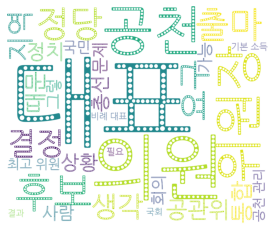

<Figure size 1440x1440 with 0 Axes>

In [32]:
# wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white', width=1200, height=1000).generate_from_frequencies(count_list) 
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', background_color="white", width=1200, height=1000).generate_from_frequencies(hwang_list) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.figure(figsize = (20,20))
plt.show()

## 이낙연

In [33]:
tokens = df_lee['ner_khaiii_token']
sents = df_lee['ner_khaiii_token']

count_lists = textrank_keyword(sents, min_count=2, window=2, min_cooccurrence=2, df=0.85, max_iter=30, topk=30)

lee_list = {}
for x in count_lists:
    lee_list[x[0]] = x[1]
    
lee_list

{'강조': 6.889181582606735,
 '관련': 7.250971105660954,
 '국민': 8.311410318135522,
 '국회': 20.242966492230178,
 '논의': 7.037876882524791,
 '대책': 9.413961276589385,
 '대표': 34.41405119046315,
 '마스크': 7.45058320315713,
 '발언': 10.912701349434542,
 '비례 대표': 6.884071770078789,
 '비례 연합': 9.961727701829755,
 '소상 공인': 6.958122168440544,
 '연합 정당': 12.093379576517256,
 '예비 후보': 8.10093413431254,
 '원내 대표': 10.677723545629823,
 '위원장': 41.10418159793619,
 '의원': 11.254808974236244,
 '정당': 15.94041314540888,
 '정당 참여': 7.273803006127854,
 '정부': 14.612143838722512,
 '증액': 7.356799541377232,
 '참석': 12.916559541655072,
 '참여': 9.52034415619774,
 '총리': 8.932767905522965,
 '추경': 8.070225082567315,
 '코로': 7.427191280004902,
 '코로나': 13.959109495862817,
 '투표': 7.72047088251558,
 '회의': 18.205342609620374,
 '후보': 15.716514565749181}

In [0]:
import pickle
with open('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/이낙연_kokhaiii_keyword', 'wb') as handle:
  pickle.dump(lee_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

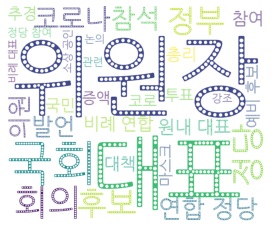

<Figure size 1440x1440 with 0 Axes>

In [35]:
# wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white', width=1200, height=1000).generate_from_frequencies(count_list) 
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', background_color="white", width=1200, height=1000).generate_from_frequencies(lee_list) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.figure(figsize = (20,20))
plt.show()

## 종로구

In [0]:
# from TextRank import TextRank 
# tr = TextRank(df_hwang)
# hwang_count = tr.count_list
# hwang_count

In [37]:
tokens = df_jongro['ner_khaiii_token']
sents = df_jongro['ner_khaiii_token']

count_lists = textrank_keyword(sents, min_count=2, window=2, min_cooccurrence=2, df=0.85, max_iter=30, topk=30)

jongro_list = {}
for x in count_lists:
    jongro_list[x[0]] = x[1]
    
jongro_list

{'가능': 22.545736421202186,
 '공매': 21.169700074203423,
 '관계자': 23.058025738171047,
 '대표': 50.84410177393191,
 '마스크': 64.6921233021797,
 '문제': 20.795456798089294,
 '발생': 24.180751661603654,
 '발표': 21.334498792488787,
 '사람': 19.031861853066786,
 '상황': 32.030945089931855,
 '시민': 26.072072591094013,
 '시장': 19.698546860600576,
 '약국': 34.000776685467216,
 '위원장': 22.10495979084727,
 '의원': 20.68670894539674,
 '장관': 21.986677422844565,
 '정당': 24.689683114945502,
 '정부': 37.23416988799281,
 '조치': 26.529320465812564,
 '지역': 24.35409317849659,
 '지원': 20.2048073457175,
 '진행': 23.99311022472862,
 '참석': 20.97812384381355,
 '필요': 19.023314551189326,
 '확산': 20.295744567135507,
 '확인': 21.43108914913377,
 '확진자': 30.862170996822186,
 '회견': 20.498317997860937,
 '회의': 34.36776008379429,
 '후보': 23.58716243157242}

In [0]:
import pickle
with open('/content/drive/My Drive/fininsight/21대 총선분석/TexkRank/Data/종로구_kokhaiii_keyword', 'wb') as handle:
  pickle.dump(jongro_list, handle, protocol=pickle.HIGHEST_PROTOCOL)

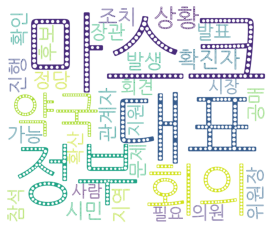

<Figure size 1440x1440 with 0 Axes>

In [39]:
# wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white', width=1200, height=1000).generate_from_frequencies(count_list) 
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf', background_color="white", width=1200, height=1000).generate_from_frequencies(jongro_list) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.figure(figsize = (20,20))
plt.show()

#### textrank 함수

In [0]:
from collections import Counter

def scan_vocabulary(sents, min_count=2):
    sen = [sent for sent in sents[:5]]
    counter = Counter([y for x in sen for y in x]) 
    counter = {w:c for w,c in counter.items() if c >= min_count}
    idx_to_vocab = [w for w, _ in sorted(counter.items(), key=lambda x:-x[1])]
    vocab_to_idx = {vocab:idx for idx, vocab in enumerate(idx_to_vocab)}
    return idx_to_vocab, vocab_to_idx

from collections import defaultdict

def cooccurrence(tokens, vocab_to_idx, window=2, min_cooccurrence=2):
    counter = defaultdict(int)
    for s, tokens_i in enumerate(tokens):
        vocabs = [vocab_to_idx[w] for w in tokens_i if w in vocab_to_idx]
        n = len(vocabs)
        for i, v in enumerate(vocabs):
            if window <= 0:
                b, e = 0, n
            else:
                b = max(0, i - window)
                e = min(i + window, n)
            for j in range(b, e):
                if i == j:
                    continue
                counter[(v, vocabs[j])] += 1
                counter[(vocabs[j], v)] += 1
    counter = {k:v for k,v in counter.items() if v >= min_cooccurrence}
    n_vocabs = len(vocab_to_idx)
    return dict_to_mat(counter, n_vocabs, n_vocabs)

from scipy.sparse import csr_matrix

def dict_to_mat(d, n_rows, n_cols):
    rows, cols, data = [], [], []
    for (i, j), v in d.items():
        rows.append(i)
        cols.append(j)
        data.append(v)
    return csr_matrix((data, (rows, cols)), shape=(n_rows, n_cols))

def word_graph(sents, min_count=2, window=2, min_cooccurrence=2):
    idx_to_vocab, vocab_to_idx = scan_vocabulary(sents, min_count)
#     tokens = [y for x in sen for y in x]
    g = cooccurrence(tokens, vocab_to_idx, window, min_cooccurrence) # , cooccurrence
    return g, idx_to_vocab

import numpy as np
from sklearn.preprocessing import normalize

def pagerank(x, df=0.85, max_iter=30):
    assert 0 < df < 1

    # initialize
    A = normalize(x, axis=0, norm='l1')
    R = np.ones(A.shape[0]).reshape(-1,1)
    bias = (1 - df) * np.ones(A.shape[0]).reshape(-1,1)

    # iteration
    for _ in range(max_iter):
        R = df * (A * R) + bias

    return R

def textrank_keyword(sents,  min_count, window, min_cooccurrence, df=0.85, max_iter=30, topk=30):
    g, idx_to_vocab = word_graph(sents,  min_count, window, min_cooccurrence)
    R = pagerank(g, df, max_iter).reshape(-1)
    idxs = R.argsort()[-topk:]
    keywords = [(idx_to_vocab[idx], R[idx]) for idx in reversed(idxs)]
    return keywords

sents = df['khaiii_complex']

count_lists = textrank_keyword(sents, min_count=2, window=2, min_cooccurrence=2, df=0.85, max_iter=30, topk=30)

jongro_count = {}
for x in count_lists:
    jongro_count[x[0]] = x[1]
    
jongro_count